In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

### Load dataset

In [44]:
data = np.loadtxt('train.csv', skiprows=1, delimiter=',')

In [58]:
X = data[:, 1:].reshape(len(data), 28, 28)
y = data[:, 0]

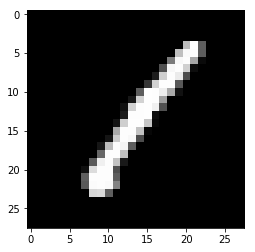

In [59]:
plt.imshow(X[0], cmap='gray')

### Normalize + Split data

In [60]:
X = (X / 255).reshape(len(X), 28, 28, 1)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Train model

In [61]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1)),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [ ]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
26304/31500 [========================>.....] - ETA: 26s - loss: 0.1928 - acc: 0.9390